In [1]:
import pandas as pd
import quandl as qd
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing, cross_validation
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = qd.get("NSE/POWERGRID", authtoken="gmWv5h5b4KEUxUbiSneX")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2773 entries, 2007-10-05 to 2018-12-17
Data columns (total 7 columns):
Open                    2773 non-null float64
High                    2773 non-null float64
Low                     2773 non-null float64
Last                    2773 non-null float64
Close                   2773 non-null float64
Total Trade Quantity    2773 non-null float64
Turnover (Lacs)         2773 non-null float64
dtypes: float64(7)
memory usage: 173.3 KB


In [4]:
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2773 entries, 2007-10-05 to 2018-12-17
Data columns (total 7 columns):
Open                    2773 non-null float64
High                    2773 non-null float64
Low                     2773 non-null float64
Last                    2773 non-null float64
Close                   2773 non-null float64
Total Trade Quantity    2773 non-null float64
Turnover (Lacs)         2773 non-null float64
dtypes: float64(7)
memory usage: 173.3 KB


In [6]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2.773000e+03,2773.000000
mean,131.420303,133.097007,129.517743,131.295150,131.300018,5.167660e+06,6894.396859
std,38.649289,38.796675,38.441220,38.571812,38.582837,1.289703e+07,14968.104879
min,61.700000,62.000000,52.000000,59.150000,58.000000,3.406300e+04,38.250000
25%,102.100000,103.700000,100.700000,102.300000,102.150000,2.124667e+06,2360.820000
50%,113.600000,115.000000,111.900000,113.350000,113.300000,3.391462e+06,4217.690000
75%,149.000000,150.950000,146.700000,148.850000,148.550000,5.539334e+06,7746.170000
max,226.500000,226.600000,223.000000,225.500000,225.950000,4.810589e+08,493056.070000


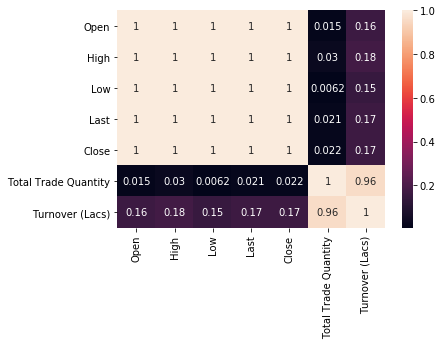

In [7]:
plt.figure(1)
sns.heatmap(df.corr(), annot=True)
plt.show()

/home/navjot/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


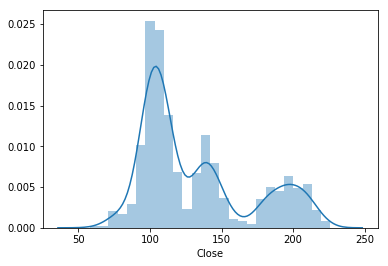

In [8]:
plt.figure(2)
sns.distplot(df.Close)
plt.show()

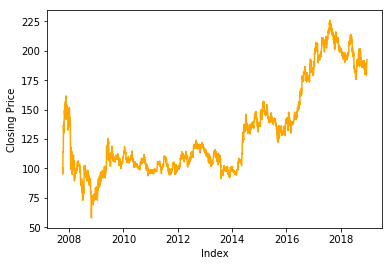

In [9]:
plt.figure(3)
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.plot(df.Close, color='orange')
plt.show()

In [10]:
df_temp = df[['Open', 'High', 'Low', 'Close', 'Total Trade Quantity']]
df_temp['HLP'] = (df_temp['High'] - df_temp['Close']) / df_temp['Close'] * 100.0
df_temp['Change'] = (df_temp['Close'] - df_temp['Open']) / df_temp['Open'] * 100
df_temp['EPS'] = (df['Turnover (Lacs)']*100000)/df['Total Trade Quantity']
df_temp['PE'] = df_temp['Close']/df_temp['EPS']

df_use = df_temp[['Close', 'HLP', 'Change', 'Total Trade Quantity', 'EPS', 'PE']]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
df_use.head()

,Close,HLP,Change,Total Trade Quantity,EPS,PE
Date,,,,,,
2007-10-05,100.60,8.846918,12.026726,481058927.0,102.493903,0.981522
2007-10-08,95.45,8.957569,-8.221154,71252858.0,98.124008,0.972749
2007-10-09,101.95,0.882786,6.753927,65658228.0,98.567753,1.034314
2007-10-10,102.90,2.040816,-1.625239,38211410.0,103.657180,0.992695
2007-10-11,114.40,4.895105,-4.666667,59805552.0,110.779598,1.032681


In [12]:
forecast_col = 'Close'

forecast_out = int(math.ceil(0.01*len(df_use)))

df_use['Label'] = df_use[forecast_col].shift(-forecast_out)

df_pred = df_use[-26:]

# print(df_pred.head(26))

df_use.dropna(inplace=True)

print(df_use.tail())

             Close       HLP    Change  Total Trade Quantity         EPS  \
Date                                                                       
2018-10-30  186.15  1.826484 -1.507937             2871863.0  186.978627   
2018-10-31  185.95  0.430223  0.459211             5412453.0  184.345989   
2018-11-01  188.45  0.451048  1.262762             3151762.0  186.726028   
2018-11-02  189.85  1.290492  0.423168             3394386.0  190.506619   
2018-11-05  186.05  1.854340 -1.586882             2740960.0  185.965501   

                  PE   Label  
Date                          
2018-10-30  0.995568  180.30  
2018-10-31  1.008701  182.55  
2018-11-01  1.009233  182.55  
2018-11-02  0.996553  185.70  
2018-11-05  1.000454  192.55  


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [13]:
print('We are predicting "', forecast_out, '" days into the future')

We are predicting " 28 " days into the future


In [14]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2745 entries, 2007-10-05 to 2018-11-05
Data columns (total 7 columns):
Close                   2745 non-null float64
HLP                     2745 non-null float64
Change                  2745 non-null float64
Total Trade Quantity    2745 non-null float64
EPS                     2745 non-null float64
PE                      2745 non-null float64
Label                   2745 non-null float64
dtypes: float64(7)
memory usage: 171.6 KB


In [25]:
X = df_use
X = X.drop(['Label'], 1)
#X = preprocessing.scale(X)

y = df_use['Label']

print(X.shape, y.shape)

(2745, 6) (2745,)


In [26]:
# X = np.array(df_use.drop(['label'], 1))
# y = np.array(df_use['label'])

# X = preprocessing.scale(X)

# print(X.shape, Y.shape)

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2196, 6) (2196,)
(549, 6) (549,)


In [27]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
slope=clf
print(accuracy)
print(slope)

0.9440042223531321
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


In [18]:
X_pred = df_pred.drop(['Label'], 1)

#X_pred = preprocessing.scale(X_pred)

y_pred = clf.predict(X_pred)

y_orig = df['Close'][-26:].iloc[:].values

In [19]:
print(y_orig)
print(y_pred)

[191.7  185.95 184.05 185.95 187.1  188.1  189.7  188.4  182.1  179.8
 182.45 182.55 184.3  180.5  180.15 183.8  187.25 183.5  183.5  182.65
 179.3  180.3  182.55 182.55 185.7  192.55]
[190.34998133 185.73899986 184.02368692 185.15683624 186.1918615
 186.70109455 188.42635519 187.96586326 182.21024911 179.88967007
 181.44691976 181.33457198 183.1072645  180.12034422 179.61351714
 181.90954251 185.89193437 182.76755916 182.64266564 181.91587712
 179.17678478 179.04225905 181.56805503 181.8915713  184.88850931
 191.68547345]


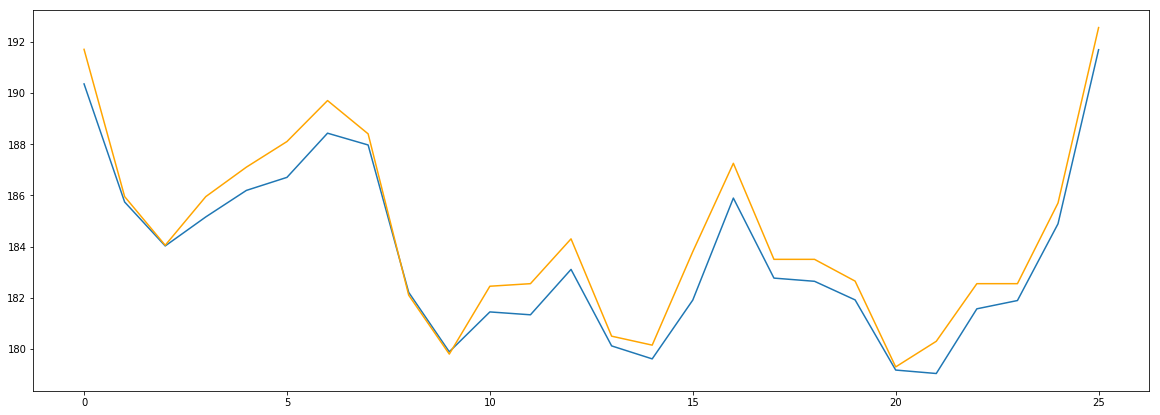

In [20]:
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111)
ax.plot(y_pred)
ax.plot(y_orig, color='orange')